In [1]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Get the training data

In [2]:
# training data
df = pd.read_csv(
    'https://github.com/wintonw/ISE364/raw/master/Midterm/project_data.csv')

#### Exploratory Data Analysis

In [3]:
df.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,target
0,A,6.8,0.63,0.04,1.30,0.058,25.0,133.0,0.99271,3.17,0.39,10.2,0
1,A,7.2,0.19,0.31,6.30,0.034,17.0,103.0,0.99305,3.15,0.52,11.4,0
2,A,6.5,0.36,0.31,13.55,0.053,20.0,113.0,0.99544,3.20,0.56,11.0,1
3,A,6.0,0.39,0.26,2.70,0.038,39.0,187.0,0.99325,3.41,0.50,10.8,1
4,A,6.2,0.36,0.45,10.40,0.060,22.0,184.0,0.99711,3.31,0.56,9.8,1


In [4]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,target
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,7.219893,0.341168,0.318972,5.458959,0.056343,30.575678,116.016009,0.994745,3.218374,0.532176,10.470840,0.795707
std,1.292492,0.164918,0.146604,4.787672,0.035012,17.852840,56.923871,0.002995,0.160303,0.149103,1.185713,0.403221
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992400,3.110000,0.430000,9.500000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,119.000000,0.994940,3.210000,0.510000,10.300000,1.000000
75%,7.700000,0.410000,0.400000,8.100000,0.066000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,1.000000
max,15.900000,1.330000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      5497 non-null   object 
 1   V1      5497 non-null   float64
 2   V2      5497 non-null   float64
 3   V3      5497 non-null   float64
 4   V4      5497 non-null   float64
 5   V5      5497 non-null   float64
 6   V6      5497 non-null   float64
 7   V7      5497 non-null   float64
 8   V8      5497 non-null   float64
 9   V9      5497 non-null   float64
 10  V10     5497 non-null   float64
 11  V11     5497 non-null   float64
 12  target  5497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 558.4+ KB


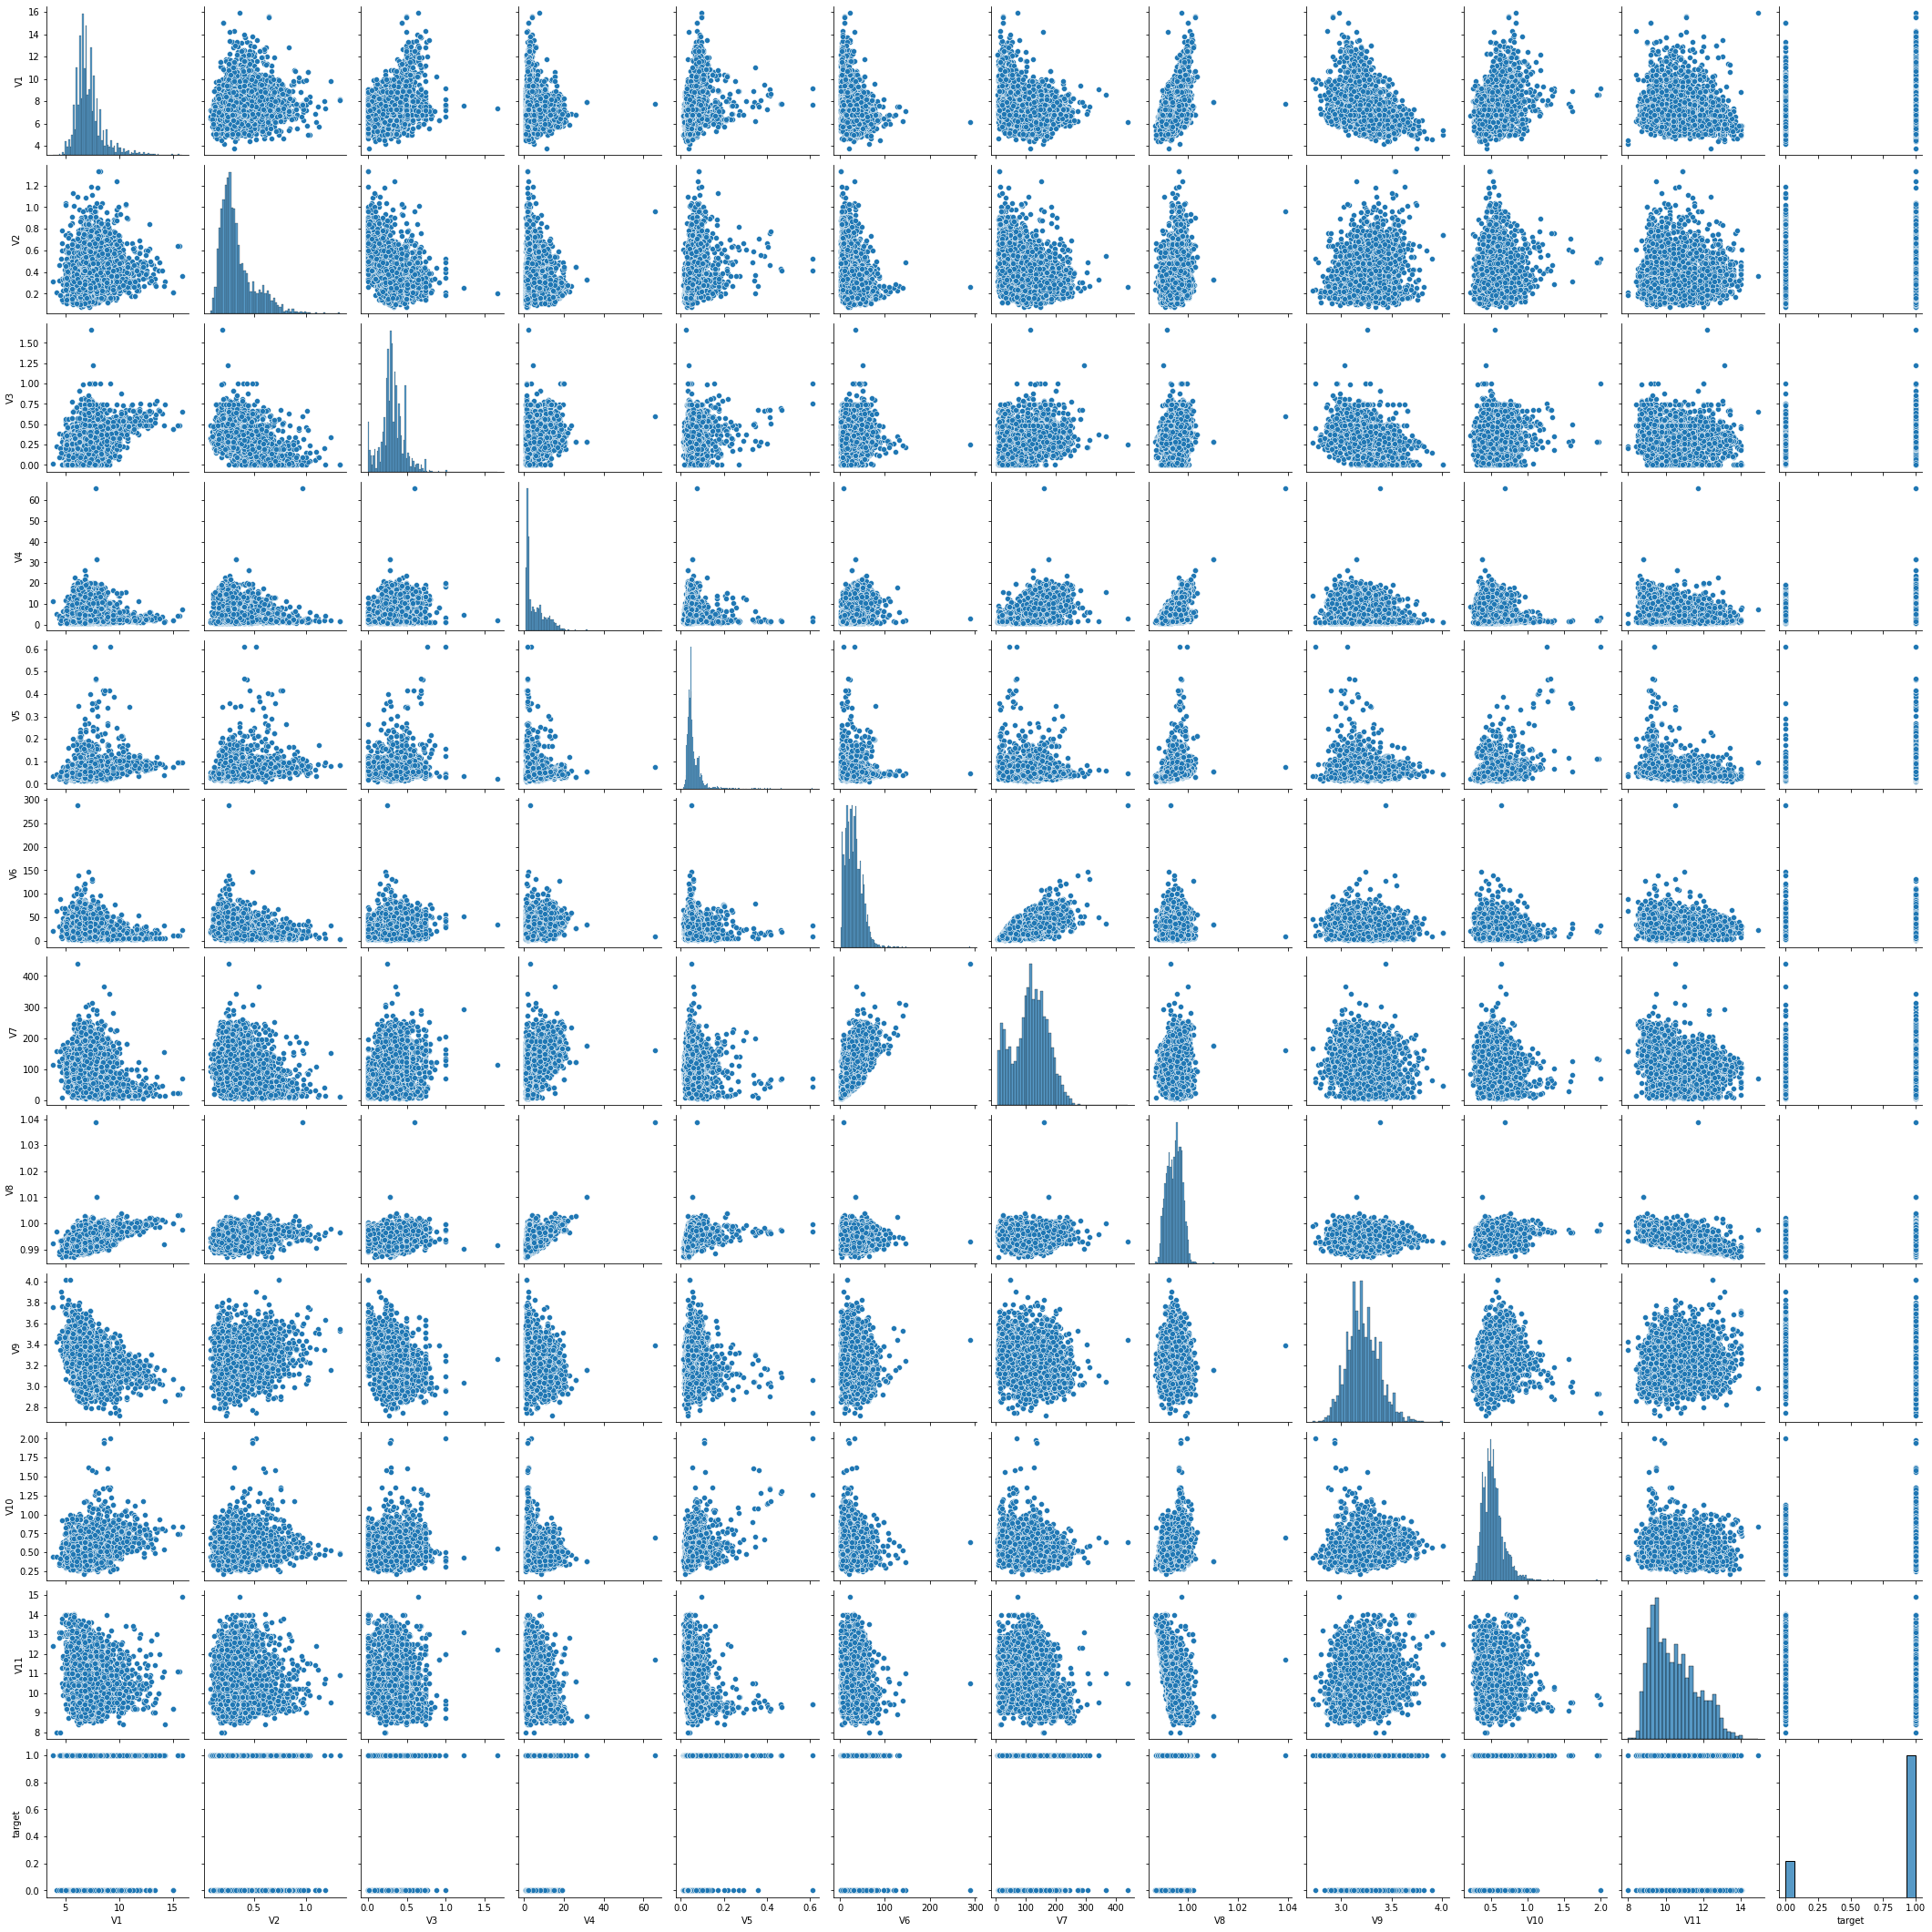

In [6]:
sns.pairplot(df)

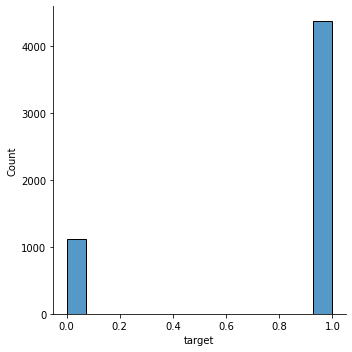

In [33]:
sns.displot(df.target)

In [7]:
df['target'].unique()

array([0, 1])

In [8]:
df['V0'].unique()

array(['A', 'B'], dtype=object)

**No nulls, but V0 will need to be transformed into numbers**

#### Clean up data

In [9]:
# V0 to binary
V0 = pd.get_dummies(df['V0'], drop_first=True)
df.drop(['V0'], axis=1, inplace=True)
df = pd.concat([df, V0], axis=1)

#### Train Test Split

In [10]:
X = df.drop('target', axis=1)
y = df.target
X_train, X_Test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=12)

### Train a Support Vector Machine Classifier Model (SVM), in grid

#### Set up train, with custom parameters 

In [11]:
param_grid = {'C':[0.1, 10, 100, 1000, 50], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001, 0.005], 'kernel':['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.795, total=   0.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.795, total=   0.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.795, total=   0.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.795, total=   0.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.795, total=   0.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.795, total=   0.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.795, total=   0.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.795, total=   0.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.795, total=   0.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  2.2min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 10, 100, 1000, 50],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.005],
                         'kernel': ['rbf']},
             verbose=3)

#### Model Evaluation

In [12]:
print(grid.best_params_)
grid_predictions = grid.predict(X_Test)
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
[[  78  255]
 [   6 1311]]
              precision    recall  f1-score   support

           0       0.93      0.23      0.37       333
           1       0.84      1.00      0.91      1317

    accuracy                           0.84      1650
   macro avg       0.88      0.61      0.64      1650
weighted avg       0.86      0.84      0.80      1650



**This is not prefect but it's not bad**

### Unbalance Cases

#### Treat it as underbalanced

In [14]:
from imblearn.under_sampling import RandomUnderSampler

In [15]:
rus = RandomUnderSampler(random_state=12)
X_resample, y_resample = rus.fit_sample(X_train, y_train)

In [16]:
param_grid = {'C':[0.1, 10, 100, 1000, 50], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001, 0.005], 'kernel':['rbf']}
grid_under = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid_under.fit(X_resample, y_resample)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.582, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.506, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.585, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.601, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.513, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.646, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.566, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.646, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.538, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.595, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   20.0s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 10, 100, 1000, 50],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.005],
                         'kernel': ['rbf']},
             verbose=3)

In [17]:
print(grid_under.best_params_)
grid_under_predictions = grid_under.predict(X_Test)
print(confusion_matrix(y_test, grid_under_predictions))
print(classification_report(y_test, grid_under_predictions))

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
[[218 115]
 [373 944]]
              precision    recall  f1-score   support

           0       0.37      0.65      0.47       333
           1       0.89      0.72      0.79      1317

    accuracy                           0.70      1650
   macro avg       0.63      0.69      0.63      1650
weighted avg       0.79      0.70      0.73      1650



**Worse than the first model where there was no balancing**

#### Overbalanced

In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
sm = SMOTE(random_state=12, sampling_strategy='auto')
X_over, y_over = sm.fit_sample(X_train, y_train)

In [20]:
param_grid = {'C':[0.1, 10, 100, 1000, 50], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001, 0.005], 'kernel':['rbf']}
grid_over = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid_over.fit(X_over, y_over)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.590, total=   0.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.540, total=   0.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.518, total=   0.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.522, total=   0.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.532, total=   0.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.693, total=   0.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.724, total=   0.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.718, total=   0.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.695, total=   0.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  4.0min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 10, 100, 1000, 50],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.005],
                         'kernel': ['rbf']},
             verbose=3)

In [21]:
print(grid_over.best_params_)
grid_over_predictions = grid_over.predict(X_Test)
print(confusion_matrix(y_test, grid_over_predictions))
print(classification_report(y_test, grid_over_predictions))

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
[[ 154  179]
 [ 199 1118]]
              precision    recall  f1-score   support

           0       0.44      0.46      0.45       333
           1       0.86      0.85      0.86      1317

    accuracy                           0.77      1650
   macro avg       0.65      0.66      0.65      1650
weighted avg       0.78      0.77      0.77      1650



**Worse than the first model where there was no balancing**

### Predict new observation data

#### Get the observation data

In [22]:
df_obs = pd.read_csv('https://github.com/wintonw/ISE364/raw/master/Midterm/new_obs.csv')

#### Check for abnormalities 

In [23]:
df_obs.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,A,5.7,0.21,0.25,1.1,0.035,26.0,81.0,0.99020,3.31,0.52,11.4
1,B,8.7,0.78,0.51,1.7,0.415,12.0,66.0,0.99623,3.00,1.17,9.2
2,A,7.3,0.26,0.53,12.7,0.047,60.5,156.0,0.99840,3.06,0.45,9.1
3,A,6.9,0.40,0.37,8.9,0.053,36.0,148.0,0.99600,3.16,0.50,9.3
4,A,7.0,0.22,0.26,2.8,0.036,44.0,132.0,0.99078,3.34,0.41,12.0


In [24]:
df_obs.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,7.190100,0.331410,0.316770,5.356800,0.054337,30.248500,114.252500,0.994431,3.219200,0.526280,10.607023
std,1.318262,0.162915,0.138092,4.591515,0.035120,17.175724,54.262113,0.003007,0.163504,0.147138,1.224684
min,3.900000,0.080000,0.000000,0.800000,0.013000,3.000000,7.000000,0.987130,2.840000,0.230000,8.400000
25%,6.400000,0.220000,0.250000,1.800000,0.036000,17.000000,79.000000,0.991888,3.100000,0.420000,9.500000
50%,7.000000,0.290000,0.300000,2.900000,0.046000,29.000000,115.500000,0.994525,3.210000,0.500000,10.500000
75%,7.700000,0.390000,0.380000,8.025000,0.060000,40.000000,151.250000,0.996800,3.322500,0.600000,11.400000
max,15.600000,1.580000,0.760000,19.500000,0.422000,124.000000,243.000000,1.003200,3.900000,1.360000,14.200000


In [25]:
df_obs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      1000 non-null   object 
 1   V1      1000 non-null   float64
 2   V2      1000 non-null   float64
 3   V3      1000 non-null   float64
 4   V4      1000 non-null   float64
 5   V5      1000 non-null   float64
 6   V6      1000 non-null   float64
 7   V7      1000 non-null   float64
 8   V8      1000 non-null   float64
 9   V9      1000 non-null   float64
 10  V10     1000 non-null   float64
 11  V11     1000 non-null   float64
dtypes: float64(11), object(1)
memory usage: 93.9+ KB


#### Format obs data for predictions

In [26]:
V0_obs = pd.get_dummies(df_obs['V0'], drop_first=True)
df_obs.drop(['V0'], axis=1, inplace=True)
df_obs = pd.concat([df_obs, V0_obs], axis=1)
df_obs.rename(columns={"B": "V0"}, inplace=True)

#### Predict

In [27]:
obs_predictions = grid.predict(df_obs)

#### Save the prediction to the same obs csv

In [28]:
df_obs = pd.concat([df_obs, pd.Series(obs_predictions, name='target')], axis=1)

In [29]:
df_obs

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V0,target
0,5.7,0.21,0.25,1.1,0.035,26.0,81.0,0.99020,3.31,0.52,11.4,0,1
1,8.7,0.78,0.51,1.7,0.415,12.0,66.0,0.99623,3.00,1.17,9.2,1,1
2,7.3,0.26,0.53,12.7,0.047,60.5,156.0,0.99840,3.06,0.45,9.1,0,1
3,6.9,0.40,0.37,8.9,0.053,36.0,148.0,0.99600,3.16,0.50,9.3,0,1
4,7.0,0.22,0.26,2.8,0.036,44.0,132.0,0.99078,3.34,0.41,12.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5.7,0.21,0.24,2.3,0.047,60.0,189.0,0.99500,3.65,0.72,10.1,0,1
996,7.0,0.12,0.29,10.3,0.039,41.0,98.0,0.99564,3.19,0.38,9.8,0,1
997,11.6,0.41,0.54,1.5,0.095,22.0,41.0,0.99735,3.02,0.76,9.9,1,0
998,6.3,0.27,0.37,7.9,0.047,58.0,215.0,0.99542,3.19,0.48,9.5,0,1


In [30]:
df_obs.to_csv('predictions.csv')

### Save model with pickle

In [31]:
import pickle

In [32]:
pickle.dump(grid, open('finalized_model.sav', 'wb'))